#**CRICKET MATCH WINNER PREDICTION**
>*COURSE CODE: CSE4020*<br>
*COURSE TITLE: MACHINE LEARNING*<br>
*COURSE SLOT: D1*<br>
*COURSE FACULTY: Dr.Bhargavi R*<br>
####**TEAM MEMBERS**
>*1. Sumegh S Gonugade | 20BCE1100*<br>
*2. G Nithish Kanna | 20BCE1304*


##**DATASETS : [DRIVE LINK](https://drive.google.com/drive/folders/1NPTY3a7OjGoF0LBP8truQWsyirnqal3G?usp=sharing)**

##**CODE IMPLEMENTATION**

In [35]:
#Basic data processing libraries
import numpy as np 
import pandas as pd 
import os

#Visualisation libraries
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.tools as tls


#Machine learning model libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

#Library to mount google drive
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#####**Loading the training data**

In [2]:
# Reading the Deliveries and Matches Dataset
TRM=pd.read_csv('gdrive/My Drive/drive-download-20230323T040107Z-001/Trainmatches.csv')
TRM.index=TRM["id"]

TRD=pd.read_csv('gdrive/My Drive/drive-download-20230323T040107Z-001/TrainDeliveries.csv')


In [3]:
TRM.head()

,id,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
1,1,2017,City1,Team1,Team5,Team5,field,normal,0,Team1,35,0,Player 467,Stadium1
2,2,2017,City2,Team2,Team4,Team4,field,normal,0,Team4,0,7,Player 405,Stadium2
3,3,2017,City3,Team3,Team6,Team6,field,normal,0,Team6,0,10,Player 85,Stadium3
4,4,2017,City4,Team4,Team8,Team8,field,normal,0,Team8,0,6,Player 145,Stadium4
5,5,2017,City5,Team5,Team7,Team5,bat,normal,0,Team5,15,0,Player 209,Stadium5


In [4]:
TRM.shape

(500, 14)

In [5]:
TRD.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Team1,Team5,1,1,Player 105,Player 354,Player 431,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Team1,Team5,1,2,Player 105,Player 354,Player 431,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Team1,Team5,1,3,Player 105,Player 354,Player 431,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Team1,Team5,1,4,Player 105,Player 354,Player 431,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Team1,Team5,1,5,Player 105,Player 354,Player 431,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
TRD.shape

(118666, 21)

####**Dropping Null Values**

In [7]:
TRM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 500
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               500 non-null    int64 
 1   season           500 non-null    int64 
 2   city             500 non-null    object
 3   team1            500 non-null    object
 4   team2            500 non-null    object
 5   toss_winner      500 non-null    object
 6   toss_decision    500 non-null    object
 7   result           500 non-null    object
 8   dl_applied       500 non-null    int64 
 9   winner           499 non-null    object
 10  win_by_runs      500 non-null    int64 
 11  win_by_wickets   500 non-null    int64 
 12  player_of_match  500 non-null    object
 13  venue            500 non-null    object
dtypes: int64(5), object(9)
memory usage: 58.6+ KB


***There is one null value in column 'winner'***

In [8]:
#Finding the row index of null value
null_columns=TRM.columns[TRM.isnull().any()]
TRM[null_columns].isnull().sum()
print(TRM[TRM["winner"].isnull()][null_columns])

    winner
id        
301    NaN


In [9]:
# Dropping that row 
TRM=TRM.drop(index=301)
TRM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 1 to 500
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               499 non-null    int64 
 1   season           499 non-null    int64 
 2   city             499 non-null    object
 3   team1            499 non-null    object
 4   team2            499 non-null    object
 5   toss_winner      499 non-null    object
 6   toss_decision    499 non-null    object
 7   result           499 non-null    object
 8   dl_applied       499 non-null    int64 
 9   winner           499 non-null    object
 10  win_by_runs      499 non-null    int64 
 11  win_by_wickets   499 non-null    int64 
 12  player_of_match  499 non-null    object
 13  venue            499 non-null    object
dtypes: int64(5), object(9)
memory usage: 58.5+ KB


#####**Visualising teams performance as Wins over Total Matches**

In [10]:
# Forming the dataframe to store each teams  total match count and win count
matches_played_byteams=pd.concat([TRM['team1'],TRM['team2']])
matches_played_byteams=matches_played_byteams.value_counts().reset_index()
matches_played_byteams.columns=['Team','Total Matches']
matches_played_byteams['wins']=TRM['winner'].value_counts().reset_index()['winner']
matches_played_byteams.set_index('Team',inplace=True)
matches_played_byteams

,Total Matches,wins
Team,,
Team2,122,71
Team1,117,67
Team5,117,59
Team6,115,57
Team7,115,56
Team8,113,56
Team10,109,51
Team9,101,50
Team4,61,22


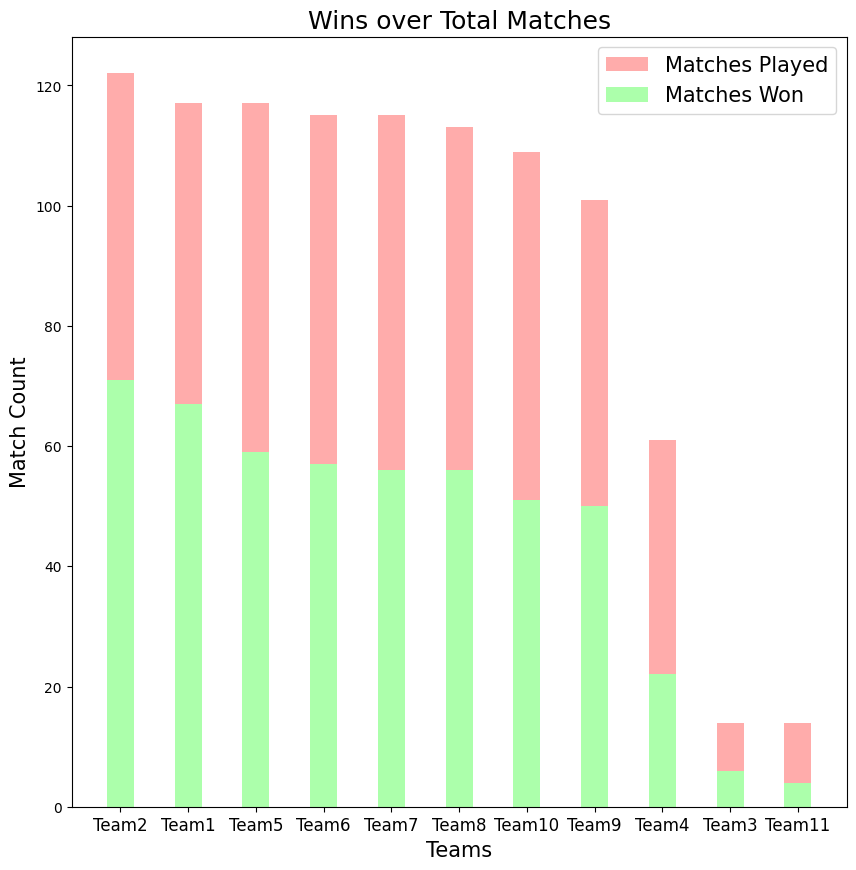

In [29]:
#Plotting the counts as layerd bar plots

fig = plt.figure(figsize = (10,10))
plt.bar(matches_played_byteams.index,matches_played_byteams['Total Matches'], 0.4, label = 'Matches Played', color = '#ffacab')
plt.bar(matches_played_byteams.index,matches_played_byteams['wins'], 0.4, label = 'Matches Won', color = '#acffab')
plt.title('Wins over Total Matches', fontsize = 18)
plt.xlabel('Teams', fontsize = 15)
plt.xticks(fontsize = 12)
plt.ylabel('Match Count', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

####**Creating the Features DataFrame**

All the matches are identified by the *** match_id *** so we can make this field as the primary_index of the  feature dataframe and we have to find that total matches played .
From the given dataset we can infer that match_id lies from 1 to 500 matches.
Now setting up the team details like which teams are going to play in the match on the respective id's.So add **Team A** and **Team B** columns to the **FT** Dataframe

In [12]:
# Creating Feature Table
FT=pd.DataFrame()

# Making match_id as the index
FT["match_id"]=TRM["id"]
FT.index=FT["match_id"]

print('Total Matches Played:',TRM.shape[0])

Total Matches Played: 499


In [13]:
# Adding Team Deatils
FT["Team A"]=TRM["team1"]
FT["Team B"]=TRM["team2"]
FT = FT.drop(columns = 'match_id')
print('Teams:\n',FT['Team A'].unique())

Teams:
 ['Team1' 'Team2' 'Team3' 'Team4' 'Team5' 'Team6' 'Team7' 'Team8' 'Team10'
 'Team9' 'Team11']


####**FEATURE TEST: SEASON**

TIme is a important feature for prediciting match outcome.Since the time period reputates the growth and their downfalls statistically.In this dataset, **season** feature act as the time period of every match. Now we justify why we taken season as our feature.We also need winning_team result to explorate their winning structure.

<Figure size 800x400 with 0 Axes>

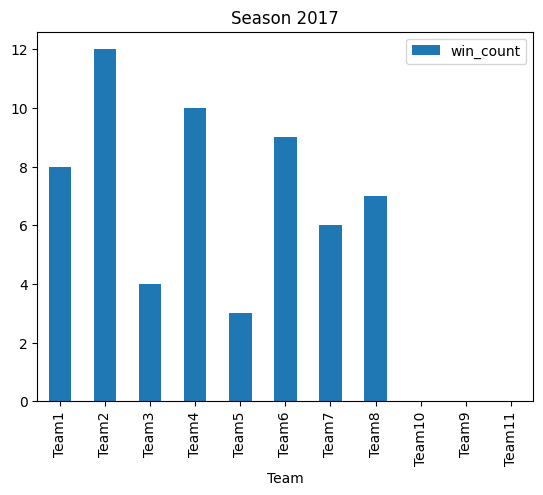

<Figure size 800x400 with 0 Axes>

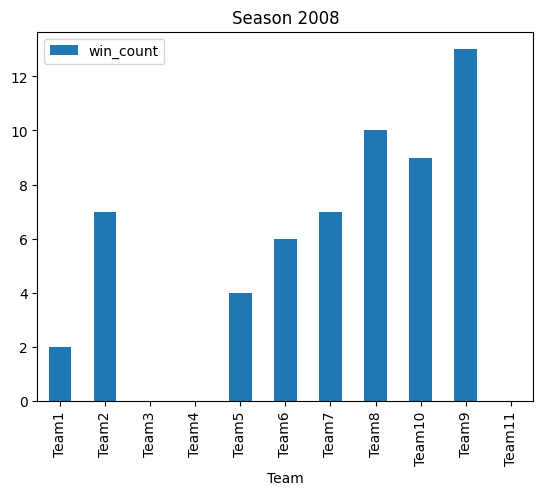

<Figure size 800x400 with 0 Axes>

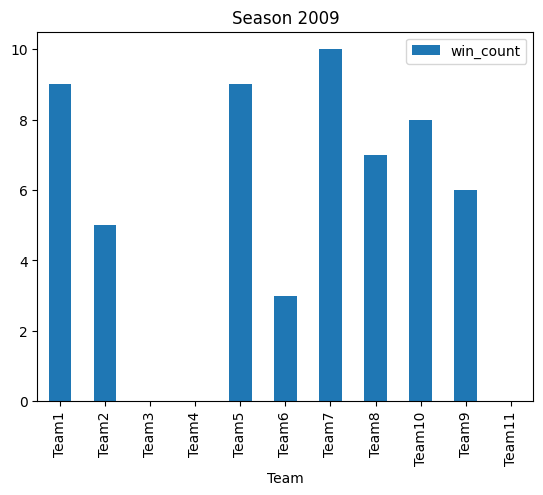

<Figure size 800x400 with 0 Axes>

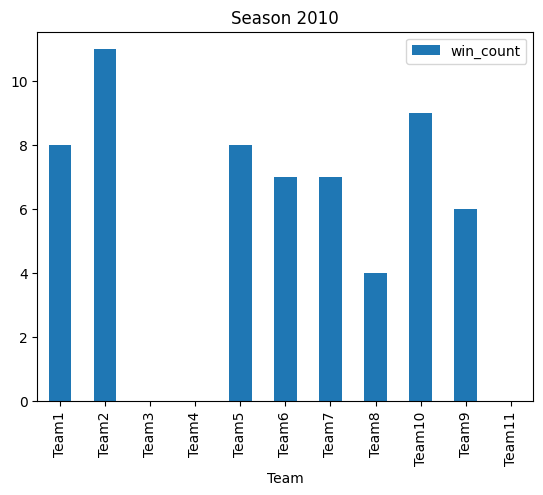

<Figure size 800x400 with 0 Axes>

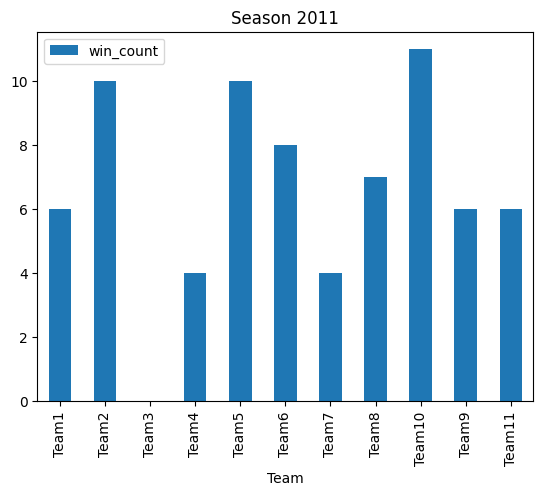

<Figure size 800x400 with 0 Axes>

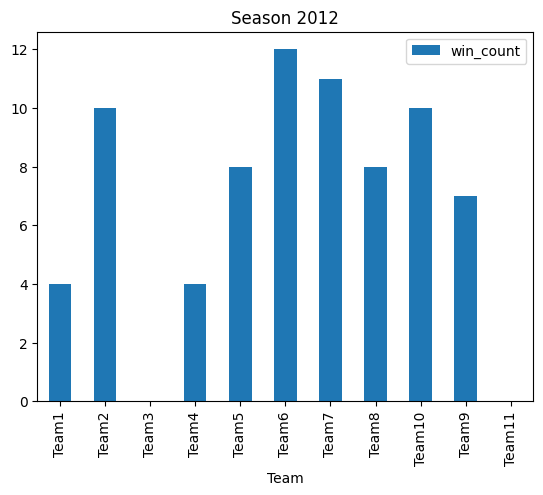

<Figure size 800x400 with 0 Axes>

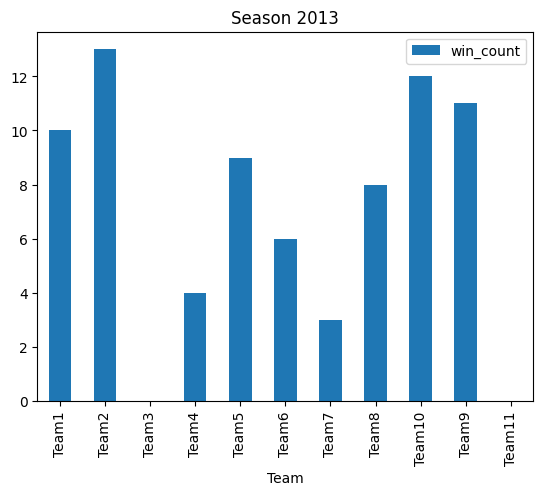

<Figure size 800x400 with 0 Axes>

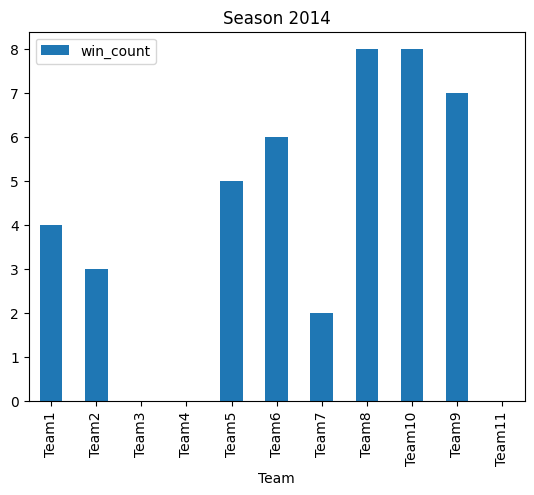

In [14]:
# Adding season and winner to the feature table
FT["season"]=TRM["season"]
FT["winner"]=TRM["winner"]

#creating the season and team list
season_list=FT['season'].unique()
team_list=FT['Team A'].unique()

#Now check the frequency of each team won during every season
temp_data=pd.DataFrame() 
temp_data["Team"]=team_list
temp_data.index=temp_data["Team"]

for s in season_list:
  winner_season=FT.loc[FT['season']== s,"winner"] 
  t=winner_season.value_counts() 
  t=t.to_frame()
  temp_data["win_count"]=t["winner"] 
  temp_data['win_count']=temp_data['win_count'].fillna(0)
  temp_data['win_count']=temp_data['win_count'].astype(int)
  tit="Season "+str(s)
  fig = plt.figure(figsize=(8,4))
  temp_data.plot(kind='bar',title=tit)
  plt.show()

Hence from the above bar plots we can infer that the team_performance varies seasonally. So we concluded the seasonal values as an important feature to the feature table.

In [15]:
#'winner' is our target variable, hence we are dropping it for now
FT = FT.drop('winner', 1)

<ipython-input-15-9b2ce92194ac>:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



####**FEATURE TEST: TOSS**

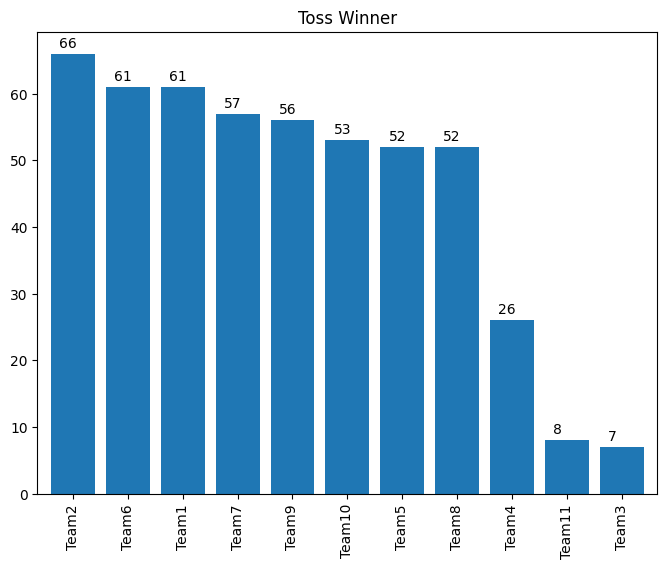

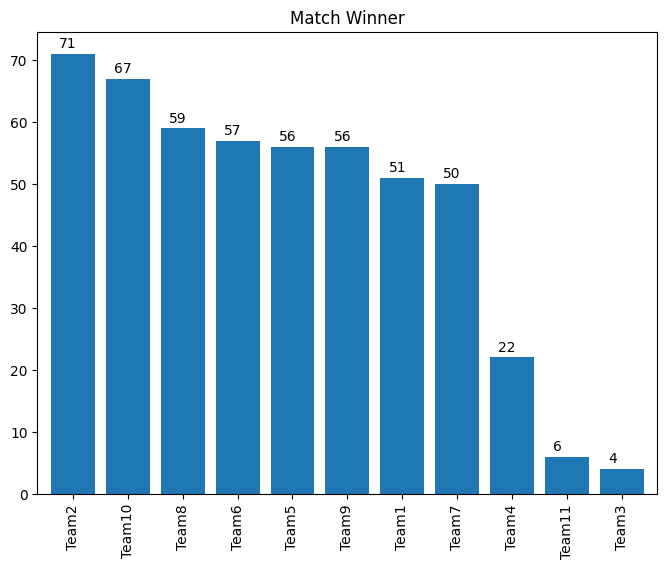

In [16]:
teams=['Team1','Team2','Team3','Team4','Team5','Team6','Team7','Team8','Team9','Team10','Team11']
t=pd.Series(teams)

# finding the frequency of toss winners and the match winners to correlate
temp_toss_winner=pd.DataFrame()
temp_toss_winner['Team']=t.values
temp_match_winner=pd.DataFrame()
temp_match_winner['Team']=t.values

#Caluclating toss_winning and match winning frequency of each team
temp_toss_winner['Count'] = temp_toss_winner['Team'].map(TRM['toss_winner'].value_counts())
temp_match_winner['Count']=temp_match_winner['Team'].map(TRM['winner'].value_counts())

plt.subplots(figsize=(8,6))
ax=TRM['toss_winner'].value_counts().plot.bar(width=0.8)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.title("Toss Winner")
plt.show()
print('\n')
plt.subplots(figsize=(8,6))
ax=TRM['winner'].value_counts().plot.bar(width=0.8)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.title("Match Winner")
plt.show()

We have to know whether toss won act as a important role in winning decision.To check we have to visulaize a probablitic calculation.

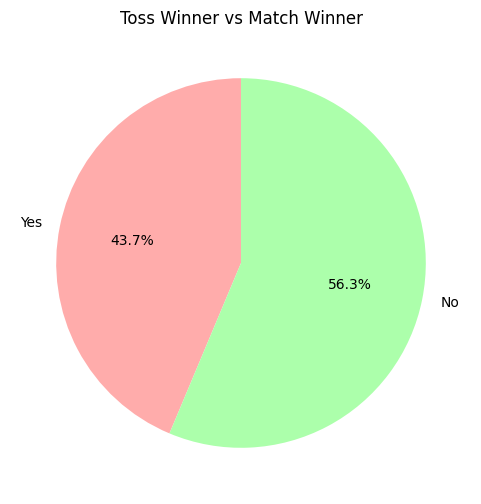

In [31]:
df=TRM[TRM['toss_winner']==TRM['winner']]
slices=[len(df),(577-len(df))]
labels=['Yes','No']
plt.pie(slices,labels=labels,startangle=90,shadow=False,explode=(0,0),autopct='%1.1f%%',colors=['#ffacab','#acffab'])
plt.title('Toss Winner vs Match Winner')
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

From this correaltion graph we can identify that toss winning also act as a major feature in predicting the result .From the graph we can infer that 43.7% toss winners are match winners.

In [18]:
# Adding the toss_winner to the feature table
FT["toss_winner"]=TRM["toss_winner"]

####**FEATURE TEST: DUCKWORTH-LEWIS METHOD**

Duckworth-Lewis method(D/L method) is a mathematical function defined to set and calculate the target score for the team batting second in One day international cricket matches. It is the most complex and irritating function for the audience who are watching cricket. When duck-worth lewis method is appiled it may errupt the entire prediction system so we should as a feature table to avoid this type of scenarios.

In [19]:
dl=TRM.loc[TRM['dl_applied'] == 1]
dl

,id,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
57,57,2017,City5,Team1,Team6,Team6,field,normal,1,Team6,0,7,Player 286,Stadium5
100,100,2008,City9,Team7,Team8,Team7,bat,normal,1,Team8,6,0,Player 125,Stadium8
103,103,2008,City8,Team6,Team10,Team6,bat,normal,1,Team10,3,0,Player 236,Stadium7
120,120,2009,City14,Team8,Team7,Team7,field,normal,1,Team7,0,10,Player 120,Stadium14
123,123,2009,City16,Team8,Team6,Team6,field,normal,1,Team6,11,0,Player 87,Stadium16
149,149,2009,City17,Team10,Team8,Team10,bat,normal,1,Team10,12,0,Player 259,Stadium17
252,252,2011,City26,Team10,Team11,Team11,field,normal,1,Team11,0,7,Player 68,Stadium27
281,281,2011,City8,Team10,Team6,Team10,bat,normal,1,Team6,10,0,Player 161,Stadium7
291,291,2011,City5,Team6,Team5,Team5,field,normal,1,Team5,0,4,Player 87,Stadium5


Totally 10 matches is influenced by D/L method. Eventhen, we select this as feature beacause our model will be trained to predict the **D/L applied mathches**.

In [20]:
FT["dl_applied"]=TRM["dl_applied"]
FT

,Team A,Team B,season,toss_winner,dl_applied
match_id,,,,,
1,Team1,Team5,2017,Team5,0
2,Team2,Team4,2017,Team4,0
3,Team3,Team6,2017,Team6,0
4,Team4,Team8,2017,Team8,0
5,Team5,Team7,2017,Team5,0
...,...,...,...,...,...
496,Team1,Team8,2014,Team8,0
497,Team2,Team6,2014,Team6,0
498,Team9,Team7,2014,Team7,0


####**FEATURE TEST:VENUE FEATURE**

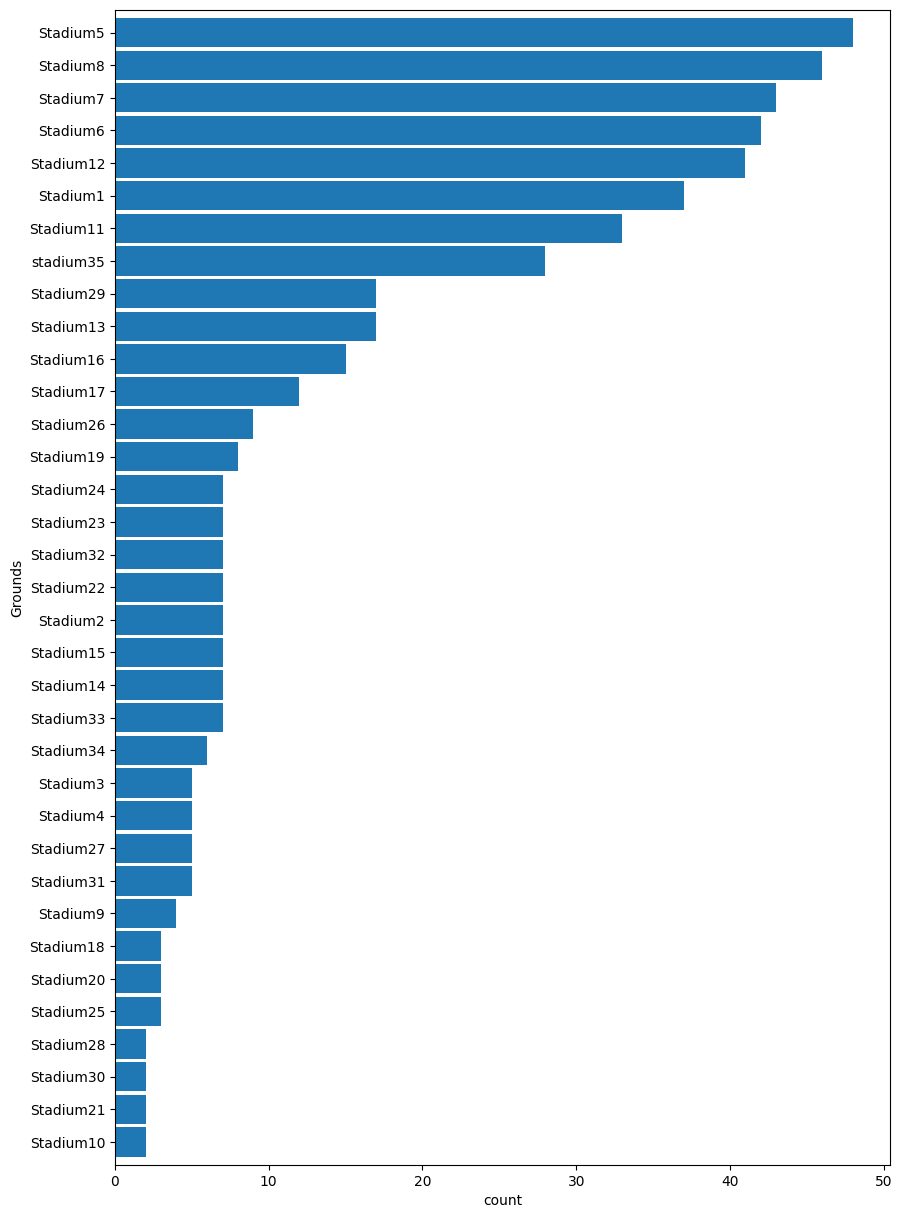

In [21]:
plt.subplots(figsize=(10,15))
ax = TRM['venue'].value_counts().sort_values(ascending=True).plot.barh(width=.9)
ax.set_ylabel('Grounds')
ax.set_xlabel('count')
plt.show()

From this visualization we can infer that most matches are conducted only on major 7 statdiums .From this we can draw to a conclusion that stadium does not play a major role in deciding the victory compare to other features.

####**FEATURE TEST: TEAM DELIVERIES**<br>

**RUNS PER OVER ACROSS SEASON**

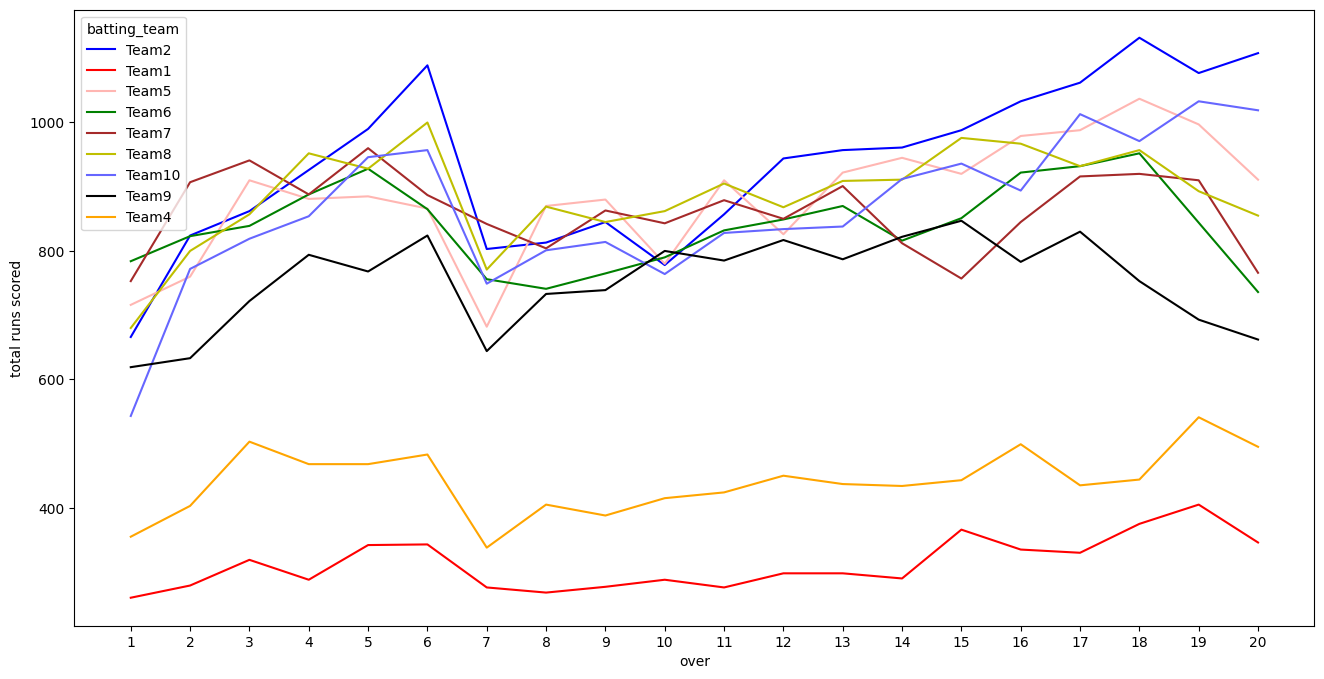

In [22]:
runs_per_over = TRD.pivot_table(index=['over'],columns='batting_team',values='total_runs',aggfunc=sum)
runs_per_over[(matches_played_byteams[matches_played_byteams['Total Matches']>50].index)].plot(color=["b", "r", "#Ffb6b2", "g",'brown','y','#6666ff','black','#FFA500']) #plotting graphs for teams that have played more than 100 matches
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.xticks(x)
plt.ylabel('total runs scored')
fig=plt.gcf()
fig.set_size_inches(16,8)
plt.show()

From this visualization we can say that we have to calculate the batting and bowling average of each team to calcuate the overall performance.

In [23]:
def Batting_Averager(df):
    over_average=pd.DataFrame()
    overs=list(range(1, 21))
    o_a=[]
    o=pd.Series(overs)
    over_average['overs']=o.values
    for i in overs:
        over_temp_frame=df.loc[df['over']== i]
        total_bruns=over_temp_frame['bye_runs'].sum()
        total_lbruns=over_temp_frame['legbye_runs'].sum()
        b_non_zero=over_temp_frame.loc[over_temp_frame['batsman_runs'] != 0,"batsman_runs"].sum()
        b_dot=over_temp_frame.loc[over_temp_frame['batsman_runs']==0,"batsman_runs"].count()
        b_dis=over_temp_frame.loc[over_temp_frame['dismissal_kind'] != 'NaN',"dismissal_kind"].count()
        oa=(1*total_bruns+1*total_lbruns+2*b_non_zero-1*b_dot+-3*b_dis)/5
        o_a.append(oa)
    o_a=pd.Series(o_a)
    over_average['average']=o_a.values
    bat_av=over_average["average"].mean()
    return bat_av
    

def Bowling_Averager(df):
    over_average=pd.DataFrame()
    overs=list(range(1, 21))
    o_a=[]
    o=pd.Series(overs)
    over_average['overs']=o.values
    for i in overs:
        over_temp_frame=df.loc[df['over']== i]
        total_wr=over_temp_frame['wide_runs'].sum()
        total_nb=over_temp_frame['noball_runs'].sum()
        total_pr=over_temp_frame['penalty_runs'].sum()
        total_er=over_temp_frame['extra_runs'].sum()
        b_non_zero=over_temp_frame.loc[over_temp_frame['total_runs'] != 0,"total_runs"].sum()
        b_dot=over_temp_frame.loc[over_temp_frame['total_runs']==0,"total_runs"].count()
        b_dis=over_temp_frame.loc[over_temp_frame['dismissal_kind'] != 'NaN',"dismissal_kind"].count()
        oa=(-1*total_wr+-1*total_nb+-2*total_pr+-1*total_er+-2*b_non_zero+5*b_dot+10*b_dis)/7
        o_a.append(oa)
    o_a=pd.Series(o_a)
    over_average['average']=o_a.values
    bow_av=over_average["average"].mean()
    return(bow_av)



#creating team_performance dataframe
team_performance=pd.DataFrame()
team_performance["match_id"]=TRM["id"]
team_performance.index=team_performance["match_id"]
team_performance["Team_A_Batting_Average"]=0.0
team_performance["Team_A_Bowling_Average"]=0.0
team_performance["Team_A_Total_Runs"]=0
team_performance["Team_B_Batting_Average"]=0.0
team_performance["Team_B_Bowling_Average"]=0.0
team_performance["Team_B_Total_Runs"]=0
team_performance["Team_A_overall"]=0.0
team_performance["Team_B_overall"]=0.0
team_performance["super_over"]='0'

# creating match_id list
match_id_list=TRM["id"].unique()
overs_list=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]


for m in match_id_list:
    match_frame=TRD.loc[TRD["match_id"]==m]
    temp=FT.loc[m,"Team A":"Team B"]
    team_dict=temp.to_dict()
    FLAG=False
    team_perform_dict={"match_id":m,"Team_A_Batting_Average":0.0,"Team_A_Bowling_Average":0.0,"Team_A_Total_Runs":0,"Team_B_Batting_Average":0.0,"Team_B_Bowling_Average":0.0,"Team_B_Total_Runs":0,"Team_A_overall":0.0,"Team_B_overall":0.0,"super_over":'0'}
    super_over=match_frame['is_super_over'].sum()
    
    if super_over==0:
        innings=match_frame["inning"].unique()
        super_over_innings=[]
    else :
        super_over_run={"Team_A_run":0,"Team_B_run":0}
        FLAG=True
        super_over_innings=[3,4]
    
    for i in innings:
        innings_frame=pd.DataFrame()
        innings_frame=match_frame.loc[match_frame['inning'] == i]
        batting_team=innings_frame.loc[innings_frame['inning']== i,"batting_team"].values[0]
        bowling_team=innings_frame.loc[innings_frame['inning']== i,"bowling_team"].values[0]
        
        if(team_dict['Team A']==batting_team):
            batting_team_frame=innings_frame[['over','ball','bye_runs','legbye_runs','batsman_runs','dismissal_kind']]
            bowling_team_frame=innings_frame[['over','ball','wide_runs','noball_runs','penalty_runs','extra_runs','total_runs','dismissal_kind']]
            team_perform_dict["Team_A_Batting_Average"]=Batting_Averager(batting_team_frame)
            team_perform_dict["Team_B_Bowling_Average"]=Bowling_Averager(bowling_team_frame)
            team_perform_dict["Team_A_Total_Runs"] =innings_frame['total_runs'].sum()
            
        elif(team_dict['Team B']==batting_team):
            batting_team_frame=innings_frame[['over','ball','bye_runs','legbye_runs','batsman_runs','dismissal_kind']]
            bowling_team_frame=innings_frame[['over','ball','wide_runs','noball_runs','penalty_runs','extra_runs','total_runs','dismissal_kind']]
            team_perform_dict["Team_B_Batting_Average"]=Batting_Averager(batting_team_frame)
            team_perform_dict["Team_A_Bowling_Average"]=Bowling_Averager(bowling_team_frame)
            team_perform_dict["Team_B_Total_Runs"]=innings_frame['total_runs'].sum()
        
    for i in super_over_innings:
        innings_frame=pd.DataFrame()
        innings_frame=match_frame.loc[match_frame['inning']==i]
        batting_team=innings_frame.loc[innings_frame['inning']== i,"batting_team"].values[0]
        if(team_dict['Team A']==batting_team):
            super_over_run["Team_A_run"]=innings_frame['total_runs'].sum()
        elif(team_dict['Team B']==batting_team):
            super_over_run["Team_B_run"]=innings_frame['total_runs'].sum()

    if FLAG:
        if super_over_run["Team_A_run"]>super_over_run["Team_B_run"]:
            team_perform_dict['super_over']='A'
        elif super_over_run["Team_B_run"]>super_over_run["Team_A_run"]:
            team_perform_dict['super_over']='B'
            
    team_perform_dict["Team_A_overall"]=(team_perform_dict["Team_A_Batting_Average"]+team_perform_dict["Team_A_Bowling_Average"])/2
    team_perform_dict["Team_B_overall"]=(team_perform_dict["Team_B_Batting_Average"]+team_perform_dict["Team_B_Bowling_Average"])/2

    
    df=pd.DataFrame([team_perform_dict],columns=team_perform_dict.keys())
    df.index=df["match_id"]
    match=df["match_id"].unique()
    team_performance.loc[match,:]= df.loc[df["match_id"],:]
    

team_performance

,match_id,Team_A_Batting_Average,Team_A_Bowling_Average,Team_A_Total_Runs,Team_B_Batting_Average,Team_B_Bowling_Average,Team_B_Total_Runs,Team_A_overall,Team_B_overall,super_over
match_id,,,,,,,,,,
1,1,3.57,-0.250000,207,2.54,-1.835714,172,1.660000,0.352143,0
2,2,2.82,-1.471429,184,3.25,-0.692857,187,0.674286,1.278571,0
3,3,3.09,-2.064286,183,3.13,-1.121429,184,0.512857,1.004286,0
4,4,2.59,-0.764286,163,2.48,-0.835714,164,0.912857,0.822143,0
5,5,2.24,0.228571,157,1.96,0.042857,142,1.234286,1.001429,0
...,...,...,...,...,...,...,...,...,...,...
496,496,3.18,-1.657143,205,3.70,-1.314286,211,0.761429,1.192857,0
497,497,1.98,-0.378571,141,2.18,0.071429,142,0.800714,1.125714,0
498,498,3.21,0.085714,201,1.84,-1.371429,139,1.647857,0.234286,0


####**FEATURE TEST:PLAYER OF EACH MATCH**

Player of the match will be the one who denots the extraordinary work and most probably they belong to the winning team .So we may consider to enhance our model. However, looking at some of the data, this player looks to be NOT_IN_TEAM and hence should be ignored

In [24]:
player_match_frame=pd.DataFrame()
player_match_frame["match_id"]=TRM["id"]
player_match_frame.index=player_match_frame["match_id"]
player_match_frame["man_of_match"]='NOT_IN_TEAM'
match_id_list=TRM["id"].unique()

for m in match_id_list:
    player=TRM.loc[TRM['id']== m,"player_of_match"].values[0]
    match_frame=TRD.loc[TRD["match_id"]==m]
    temp=FT.loc[m,"Team A":"Team B"]
    team_dict=temp.to_dict()
    TEAM_A_BATSMAN=match_frame.loc[match_frame['batting_team']==team_dict["Team A"],["batsman","non_striker"]]
    TEAM_A_BOWLERS=match_frame.loc[match_frame['bowling_team']==team_dict["Team A"],["bowler"]]
    TEAM_A_MEMBERS=set(list(TEAM_A_BATSMAN["batsman"].unique())+list(TEAM_A_BATSMAN["non_striker"].unique())+list(TEAM_A_BOWLERS["bowler"].unique()))
    TEAM_B_BATSMAN=match_frame.loc[match_frame['batting_team']==team_dict["Team B"],["batsman","non_striker"]]
    TEAM_B_BOWLERS=match_frame.loc[match_frame['bowling_team']==team_dict["Team B"],["bowler"]]
    TEAM_B_MEMBERS=set(list(TEAM_B_BATSMAN["batsman"].unique())+list(TEAM_B_BATSMAN["non_striker"].unique())+list(TEAM_B_BOWLERS["bowler"].unique()))
    if player in TEAM_A_MEMBERS:
        player_match_frame.at[m, 'man_of_match'] = 'A'
    elif player in TEAM_B_MEMBERS:
        player_match_frame.at[m,"man_of_match"]='B'
player_match_frame



,match_id,man_of_match
match_id,,
1,1,A
2,2,B
3,3,B
4,4,NOT_IN_TEAM
5,5,NOT_IN_TEAM
...,...,...
496,496,NOT_IN_TEAM
497,497,NOT_IN_TEAM
498,498,NOT_IN_TEAM


In [25]:
# Identify how many matches had man of match from the two playing teams
player_match_frame[player_match_frame['man_of_match'] != "NOT_IN_TEAM"]

,match_id,man_of_match
match_id,,
1,1,A
2,2,B
3,3,B
23,23,A
26,26,A
69,69,A
86,86,B
98,98,A
103,103,A


From this analytics we can infer that player_of_match given in TrainMatchesdataset is not from the two teams and hence can be neglected as a feature

####**PREPARATION OF FEATURE TABLE**

In [26]:
def df_feature(TRM,TRD,T):
    # Creating Feature Table
    F_T=pd.DataFrame()

    # Making match_id as the index
    F_T["match_id"]=TRM["id"]
    F_T.index=F_T["match_id"]

    # Adding Team Deatils
    F_T["Team A"]=TRM["team1"]
    F_T["Team B"]=TRM["team2"]

    # Adding Season Feature
    F_T["season"]=TRM["season"]

    # Adding Toss Winner Feature
    F_T["toss_winner"]=TRM["toss_winner"]

    # Adding dl feature
    F_T["dl_applied"]=TRM["dl_applied"]
    
    #Adding cross validation features
    #creating team_performance dataframe
    team_performance=pd.DataFrame()
    team_performance["match_id"]=TRM["id"]
    team_performance.index=team_performance["match_id"]
    team_performance["Team_A_Batting_Average"]=0.0
    team_performance["Team_A_Bowling_Average"]=0.0
    team_performance["Team_A_Total_Runs"]=0.0
    team_performance["Team_B_Batting_Average"]=0.0
    team_performance["Team_B_Bowling_Average"]=0.0
    team_performance["Team_B_Total_Runs"]=0.0
    team_performance["Team_A_overall"]=0.0
    team_performance["Team_B_overall"]=0.0
    team_performance["super_over"]='0'

    # creating match_id list
    match_id_list=TRM["id"].unique()
    overs_list=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]


    for m in match_id_list:
        match_frame=TRD.loc[TRD["match_id"]==m]
        temp=F_T.loc[m,"Team A":"Team B"]
        team_dict=temp.to_dict()
        FLAG=False
        team_perform_dict={"match_id":m,"Team_A_Batting_Average":0.0,"Team_A_Bowling_Average":0.0,"Team_A_Total_Runs":0,"Team_B_Batting_Average":0.0,"Team_B_Bowling_Average":0.0,"Team_B_Total_Runs":0,"Team_A_overall":0.0,"Team_B_overall":0.0,"super_over":0}
        super_over=match_frame['is_super_over'].sum()
    
        if super_over==0:
            innings=match_frame["inning"].unique()
            super_over_innings=[]
        else :
            super_over_run={"Team_A_run":0,"Team_B_run":0}
            FLAG=True
            super_over_innings=[3,4]
    
        for i in innings:
            innings_frame=pd.DataFrame()
            innings_frame=match_frame.loc[match_frame['inning'] == i]
            batting_team=innings_frame.loc[innings_frame['inning']== i,"batting_team"].values[0]
            bowling_team=innings_frame.loc[innings_frame['inning']== i,"bowling_team"].values[0]
        
            if(team_dict['Team A']==batting_team):
                batting_team_frame=innings_frame[['over','ball','bye_runs','legbye_runs','batsman_runs','dismissal_kind']]
                bowling_team_frame=innings_frame[['over','ball','wide_runs','noball_runs','penalty_runs','extra_runs','total_runs','dismissal_kind']]
                team_perform_dict["Team_A_Batting_Average"]=Batting_Averager(batting_team_frame)
                team_perform_dict["Team_B_Bowling_Average"]=Bowling_Averager(bowling_team_frame)
                team_perform_dict["Team_A_Total_Runs"] =innings_frame['total_runs'].sum()
            
            elif(team_dict['Team B']==batting_team):
                batting_team_frame=innings_frame[['over','ball','bye_runs','legbye_runs','batsman_runs','dismissal_kind']]
                bowling_team_frame=innings_frame[['over','ball','wide_runs','noball_runs','penalty_runs','extra_runs','total_runs','dismissal_kind']]
                team_perform_dict["Team_B_Batting_Average"]=Batting_Averager(batting_team_frame)
                team_perform_dict["Team_A_Bowling_Average"]=Bowling_Averager(bowling_team_frame)
                team_perform_dict["Team_B_Total_Runs"] =innings_frame['total_runs'].sum()
        
        for i in super_over_innings:
            innings_frame=pd.DataFrame()
            innings_frame=match_frame.loc[match_frame['inning']==i]
            batting_team=innings_frame.loc[innings_frame['inning']== i,"batting_team"].values[0]
            if(team_dict['Team A']==batting_team):
                super_over_run["Team_A_run"]=innings_frame['total_runs'].sum()
            elif(team_dict['Team B']==batting_team):
                super_over_run["Team_B_run"]=innings_frame['total_runs'].sum()

        if FLAG:
            if super_over_run["Team_A_run"]>super_over_run["Team_B_run"]:
                team_perform_dict['super_over']=1
            elif super_over_run["Team_B_run"]>super_over_run["Team_A_run"]:
                team_perform_dict['super_over']=2
            
        team_perform_dict["Team_A_overall"]=(team_perform_dict["Team_A_Batting_Average"]+team_perform_dict["Team_A_Bowling_Average"])/2
        team_perform_dict["Team_B_overall"]=(team_perform_dict["Team_B_Batting_Average"]+team_perform_dict["Team_B_Bowling_Average"])/2

    
        df=pd.DataFrame([team_perform_dict],columns=team_perform_dict.keys())
        df.index=df["match_id"]
        match=df["match_id"].unique()
        team_performance.loc[match,:]= df.loc[df["match_id"],:]
        
    F_T["Team_A_Batting_Average"]=team_performance["Team_A_Batting_Average"]
    F_T["Team_A_Bowling_Average"]=team_performance["Team_A_Bowling_Average"]
    F_T["Team_A_Total_Runs"]=team_performance["Team_A_Total_Runs"]
    F_T["Team_B_Batting_Average"]=team_performance["Team_B_Batting_Average"]
    F_T["Team_B_Bowling_Average"]=team_performance["Team_B_Bowling_Average"]
    F_T["Team_B_Total_Runs"]=team_performance["Team_B_Total_Runs"]
    F_T["Team_A_overall"]=team_performance["Team_A_overall"]
    F_T["Team_B_overall"]=team_performance["Team_B_overall"]
    F_T["super_over"]=team_performance["super_over"]
    
    if(T):
        #Winner Field
        winner_frame=pd.DataFrame()
        winner_frame["match_id"]=TRM["id"]
        winner_frame.index=winner_frame["match_id"]
        winner_frame["winner"]=0
        match_id_list=TRM["id"].unique()

        for m in match_id_list:
            winner=TRM.loc[TRM['id']== m,"winner"].values[0]
            temp=F_T.loc[m,"Team A":"Team B"]
            team_dict=temp.to_dict()
            if(winner==team_dict["Team A"]):
                winner_frame.at[m, 'winner'] = 0
            elif(winner==team_dict["Team B"]):
                winner_frame.at[m,'winner']=1
            
        #Adding Winner Field to F_T
        F_T["winner"]=winner_frame["winner"]
        
    return F_T
        


In [27]:
T=True
train=df_feature(TRM,TRD,T)

In [28]:
train

,match_id,Team A,Team B,season,toss_winner,dl_applied,Team_A_Batting_Average,Team_A_Bowling_Average,Team_A_Total_Runs,Team_B_Batting_Average,Team_B_Bowling_Average,Team_B_Total_Runs,Team_A_overall,Team_B_overall,super_over,winner
match_id,,,,,,,,,,,,,,,,
1,1,Team1,Team5,2017,Team5,0,3.57,-0.250000,207.0,2.54,-1.835714,172.0,1.660000,0.352143,0,0
2,2,Team2,Team4,2017,Team4,0,2.82,-1.471429,184.0,3.25,-0.692857,187.0,0.674286,1.278571,0,1
3,3,Team3,Team6,2017,Team6,0,3.09,-2.064286,183.0,3.13,-1.121429,184.0,0.512857,1.004286,0,1
4,4,Team4,Team8,2017,Team8,0,2.59,-0.764286,163.0,2.48,-0.835714,164.0,0.912857,0.822143,0,1
5,5,Team5,Team7,2017,Team5,0,2.24,0.228571,157.0,1.96,0.042857,142.0,1.234286,1.001429,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,496,Team1,Team8,2014,Team8,0,3.18,-1.657143,205.0,3.70,-1.314286,211.0,0.761429,1.192857,0,1
497,497,Team2,Team6,2014,Team6,0,1.98,-0.378571,141.0,2.18,0.071429,142.0,0.800714,1.125714,0,1
498,498,Team9,Team7,2014,Team7,0,3.21,0.085714,201.0,1.84,-1.371429,139.0,1.647857,0.234286,0,0


In [32]:
train.to_csv('gdrive/My Drive/drive-download-20230323T040107Z-001/cricket_matches.csv')

In [33]:
train_feature=["season", "dl_applied",
               "Team_A_Batting_Average", "Team_A_Bowling_Average",
               "Team_A_Total_Runs",
                "Team_B_Batting_Average", "Team_B_Bowling_Average",
               "Team_B_Total_Runs",
                "Team_A_overall","Team_B_overall","super_over"]


X_train, X_test, y_train, y_test = train_test_split(train[train_feature],train["winner"], test_size = 0.2, random_state = 10)

####**ALGO: NAIVE BAYES ALGORITHM**

The accuracy using NB is: 86.0
The f1 score using NB is: 0.8703703703703703
The recall score using NB is: 0.8245614035087719
The precision using NB is: 0.9215686274509803




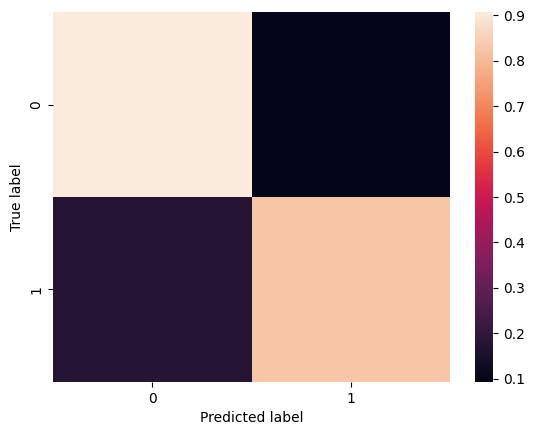

In [36]:
#Create a Gaussian Classifier
NB_model = GaussianNB()

# Train the model using the training sets 
NB_model.fit(X_train,y_train)

#Predict Output 
predicted= NB_model.predict(X_test)
nb_accuracy = accuracy_score(y_test,predicted)
print('The accuracy using NB is:',format(nb_accuracy*100))
F_1score=f1_score(y_test,predicted)
print('The f1 score using NB is:',F_1score)
recall=recall_score(y_test,predicted)
print('The recall score using NB is:',recall)
precision=precision_score(y_test,predicted)
print('The precision using NB is:',precision)
print('\n')

conf_mat = confusion_matrix(y_test, predicted)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
# sns.heatmap(conf_mat)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

####**ALGO: DECISION TREE REGRESSOR**

The accuracy using DecisionTreeRegressor is: 90.0
The f1 score using DT is: 0.9107142857142856
The recall score using DT is: 0.8947368421052632
The precision using DT is: 0.9272727272727272




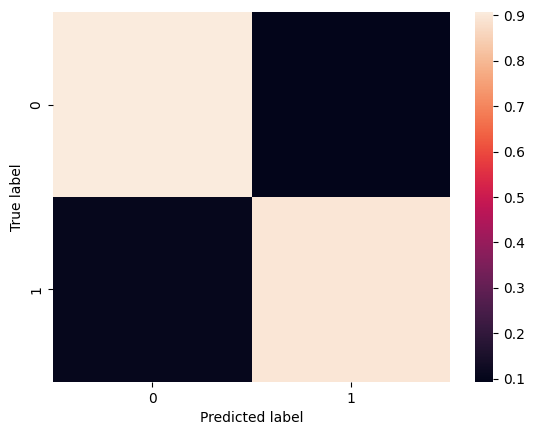

In [37]:
# Define model
DT_model = DecisionTreeRegressor()

# Fit model
DT_model.fit(X_train, y_train)

#Predict Output 
predicted= DT_model.predict(X_test)
dt_accuracy = accuracy_score(y_test,predicted)
print('The accuracy using DecisionTreeRegressor is:',format(dt_accuracy*100))
F_1score=f1_score(y_test,predicted)
print('The f1 score using DT is:',F_1score)
recall=recall_score(y_test,predicted)
print('The recall score using DT is:',recall)
precision=precision_score(y_test,predicted)
print('The precision using DT is:',precision)
print('\n')

conf_mat = confusion_matrix(y_test, predicted)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

####**ALGO: SUPPORT VECTOR MACHINE**

The accuracy using SVC Classifier is: 56.99999999999999
The f1 score using SVC is: 0.7261146496815287
The recall score using SVC is: 1.0
The precision using SVC is: 0.57




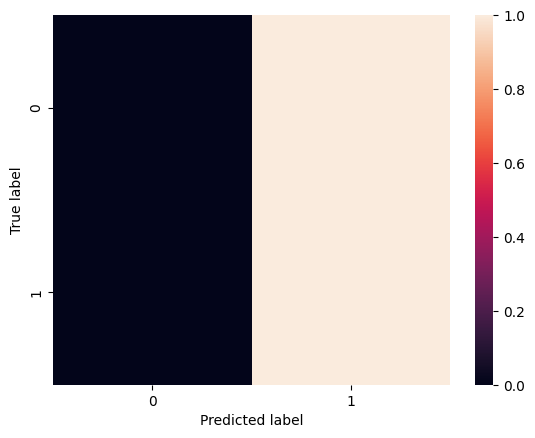

In [38]:
# Define model
SVC_model = svm.SVC()

# Fit model
SVC_model.fit(X_train, y_train)

#Predict Output 
predicted= SVC_model.predict(X_test)
svc_accuracy = accuracy_score(y_test,predicted)
print('The accuracy using SVC Classifier is:',format(svc_accuracy*100))
F_1score=f1_score(y_test,predicted)
print('The f1 score using SVC is:',F_1score)
recall=recall_score(y_test,predicted)
print('The recall score using SVC is:',recall)
precision=precision_score(y_test,predicted)
print('The precision using SVC is:',precision)
print('\n')

conf_mat = confusion_matrix(y_test, predicted)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

####**ALGO: GRID SEARCH**

In [50]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['poly'], 'degree': [2, 3, 4], 'C': [1, 10, 100, 1000]}]

# Training the model 
classifier = GridSearchCV(svm.SVC(), tuned_parameters)

# Fitting the model
classifier.fit(X_train, y_train)

print("Best parameters set found on training set:")
print(classifier.best_params_)
print("Best estimator score found on training set:")
print(classifier.best_score_)
print("\mDetailed classification report:")
y_true, y_pred = y_test, classifier.predict(X_test)

tuning_accuracy = accuracy_score(y_true,y_pred)
print('The accuracy using tuning is:',format(tuning_accuracy*100))

Best parameters set found on training set:
{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
Best estimator score found on training set:
0.9073417721518988
\mDetailed classification report:
The accuracy using tuning is: 95.0


####**ALGO: RANDOM FOREST**

The accuracy using RandomForest Classifier is: 87.0
The f1 score using RF is: 0.8907563025210085
The recall score using RF is: 0.9298245614035088
The precision using RF is: 0.8548387096774194




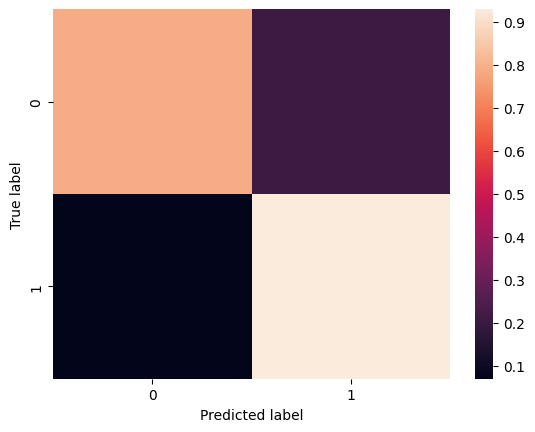

In [39]:
# Define model
RF_model = RandomForestClassifier(max_depth=2, random_state=0)

# Fit model
RF_model.fit(X_train, y_train)

#Predict Output 
predicted= RF_model.predict(X_test)

RF_accuracy = accuracy_score(y_test,predicted)
print('The accuracy using RandomForest Classifier is:',format(RF_accuracy*100))
F_1score=f1_score(y_test,predicted)
print('The f1 score using RF is:',F_1score)
recall=recall_score(y_test,predicted)
print('The recall score using RF is:',recall)
precision=precision_score(y_test,predicted)
print('The precision using RF is:',precision)
print('\n')

conf_mat = confusion_matrix(y_test, predicted)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

####**ALGO: ENSEMBLE MODEL (Voting Classifier)**
*Using Naive Bayes, SVM, Random Forest*

The accuracy using Ensemble method (Voting) is: 87.0
The f1 score using Voting is: 0.8907563025210085
The recall score using Voting is: 0.9298245614035088
The precision using Voting is: 0.8548387096774194




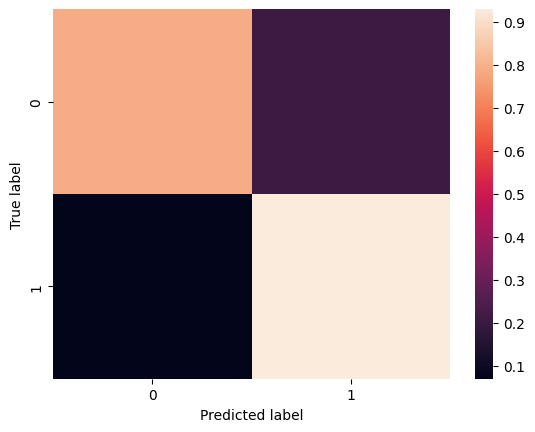

In [40]:
# Training all the model on the train dataset
final_model = VotingClassifier(
    estimators=[('nb', NB_model),('svc',SVC_model),('rf',RF_model)], 
    voting='hard')

# Fitting the model
final_model.fit(X_train, y_train)
 
# Predict Output 
predicted= final_model.predict(X_test)

Voting_accuracy = accuracy_score(y_test,predicted)
print('The accuracy using Ensemble method (Voting) is:',format(Voting_accuracy*100))
F_1score=f1_score(y_test,predicted)
print('The f1 score using Voting is:',F_1score)
recall=recall_score(y_test,predicted)
print('The recall score using Voting is:',recall)
precision=precision_score(y_test,predicted)
print('The precision using Voting is:',precision)
print('\n')
conf_mat = confusion_matrix(y_test, predicted)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

####**ALGO: ENSEMBLE MODEL (Stacking)**
*Using Naive Bayes, Random Forest, Logistic Regression & SVC*

In [41]:
def get_stacking():
    level0 = list()
    level0.append(('lr', LogisticRegression(solver='liblinear')))
    level0.append(('cart', RF_model))
    level0.append(('svm', SVC_model))
    level0.append(('bayes', NB_model))
    # define meta learner model
    level1 = LogisticRegression(solver='liblinear')
    
    # define the stacking ensemble
    stacking_model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return stacking_model

The accuracy using Ensemble method (Stacking) is: 90.0
The f1 score using Stacking is: 0.9107142857142856
The recall score using Stacking is: 0.8947368421052632
The precision using Stacking is: 0.9272727272727272




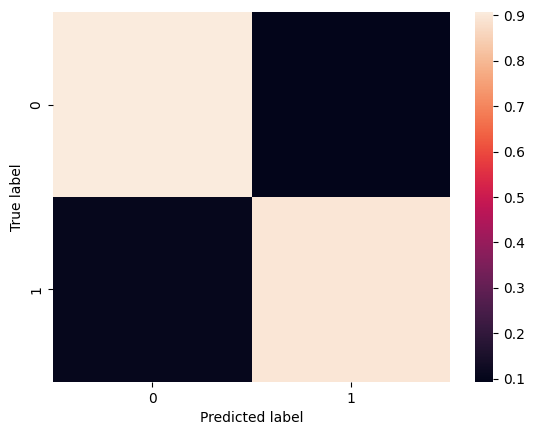

In [42]:
# Training the ensemble model (Stacking) on the train dataset

stacking_model = get_stacking()
stacking_model.fit(X_train, y_train)
 
#Predict Output 
predicted= stacking_model.predict(X_test)

stacking_accuracy = accuracy_score(y_test,predicted)
print('The accuracy using Ensemble method (Stacking) is:',format(stacking_accuracy*100))
F_1score=f1_score(y_test,predicted)
print('The f1 score using Stacking is:',F_1score)
recall=recall_score(y_test,predicted)
print('The recall score using Stacking is:',recall)
precision=precision_score(y_test,predicted)
print('The precision using Stacking is:',precision)
print('\n')

conf_mat = confusion_matrix(y_test, predicted)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

####**ALGO: ENSEMBLE MODEL (Bagging)**
*Using Pipeline based on Logistic Regression*

In [43]:
pipeline = make_pipeline(StandardScaler(),LogisticRegression(random_state=1))

The accuracy using Ensemble method (Bagging) is: 87.0
The f1 score using Bagging is: 0.8869565217391304
The recall score using Bagging is: 0.8947368421052632
The precision using Bagging is: 0.8793103448275862




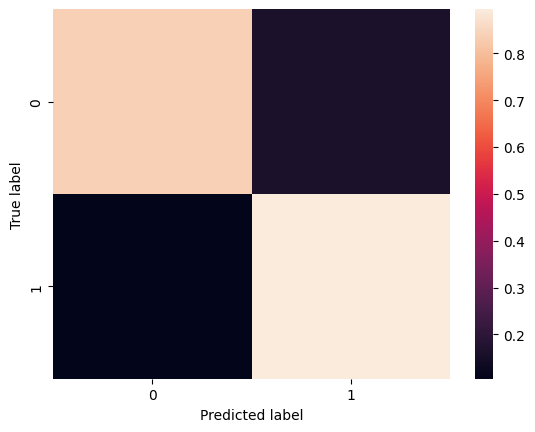

In [45]:
# Instantiating the Bagging Classifier
bgclassifier = BaggingClassifier(estimator=pipeline, n_estimators=100,
                                 max_features=10,
                                 max_samples=100,
                                 random_state=1, n_jobs=5)


# Fitting the Bagging Classifier
bgclassifier.fit(X_train, y_train)

# Predict the output
predicted= bgclassifier.predict(X_test)

bg_accuracy = accuracy_score(y_test,predicted)
print('The accuracy using Ensemble method (Bagging) is:',format(bg_accuracy*100))
F_1score=f1_score(y_test,predicted)
print('The f1 score using Bagging is:',F_1score)
recall=recall_score(y_test,predicted)
print('The recall score using Bagging is:',recall)
precision=precision_score(y_test,predicted)
print('The precision using Bagging is:',precision)
print('\n')

conf_mat = confusion_matrix(y_test, predicted)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [46]:
# Forming the XGB model
xgb_model = xgb.XGBClassifier(eta=0.1, nrounds=1000, max_depth=8, colsample_bytree=0.5, scale_pos_weight=1.1, booster='gbtree', 
                                  metric='multi:softmax')

# Predicting the output
hr_pred = xgb_model.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C')).predict(X_test._get_numeric_data())


print(classification_report(y_test, hr_pred))
xbg_accuracy = accuracy_score(y_test,hr_pred)
print('The accuracy using xgboost is:',format(xbg_accuracy*100))
F_1score=f1_score(y_test,predicted)
print('The f1 score using XG-boost is:',F_1score)
recall=recall_score(y_test,predicted)
print('The recall score using XG-boost is:',recall)
precision=precision_score(y_test,predicted)
print('The precision using XG-boost is:',precision)

[15:37:13] WARNING: ../src/learner.cc:767: 
Parameters: { "metric", "nrounds" } are not used.

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        43
           1       0.88      0.93      0.91        57

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.89       100
weighted avg       0.89      0.89      0.89       100

The accuracy using xgboost is: 89.0
The f1 score using XG-boost is: 0.8869565217391304
The recall score using XG-boost is: 0.8947368421052632
The precision using XG-boost is: 0.8793103448275862


####**COMPARITIVE ANALYSIS**

*7 models have been used for prediction. The accuracy scores from each model is tabulated and visualised below*

In [58]:
# Accuracy of various modles
print("Accuracy details of basic ML methods ")
print("*************")
print('The accuracy using Naive Bayes is:',format(nb_accuracy*100))
print('The accuracy using Decision Tree is:',format(dt_accuracy*100))
print('The accuracy using SVM is: %.1f' % (svc_accuracy*100))
print('The accuracy using RF is:',format(RF_accuracy*100))
print("\nAccuracy details of Ensemble ML methods ")
print("*************")
print('The accuracy using Ensemble(Voting) is:',format(Voting_accuracy*100))
print('The accuracy using Ensemble(Stacking) is:',format(stacking_accuracy*100))
print('The accuracy using Ensemble(Bagging) is:',format(bg_accuracy*100))
print('The accuracy using xgboost is:',format(xbg_accuracy*100))

print("\n*************")
print('The  best accuracy is using grid searchand it is:',format(tuning_accuracy*100))

Accuracy details of basic ML methods 
*************
The accuracy using Naive Bayes is: 86.0
The accuracy using Decision Tree is: 90.0
The accuracy using SVM is: 57.0
The accuracy using RF is: 87.0

Accuracy details of Ensemble ML methods 
*************
The accuracy using Ensemble(Voting) is: 87.0
The accuracy using Ensemble(Stacking) is: 90.0
The accuracy using Ensemble(Bagging) is: 87.0
The accuracy using xgboost is: 89.0

*************
The  best accuracy is using grid searchand it is: 95.0


In [54]:
d={'Algorithms':['Naive Bayes','Decision Tree','SVM','Grid Search','Random Forest','Voting','Stacking','Bagging','XG-BOOST'],'Accuracy':[86,90,57,95,87,87,90,87,89]}
df=pd.DataFrame(data=d)
df

,Algorithms,Accuracy
0,Naive Bayes,86
1,Decision Tree,90
2,SVM,57
3,Grid Search,95
4,Random Forest,87
5,Voting,87
6,Stacking,90
7,Bagging,87
8,XG-BOOST,89


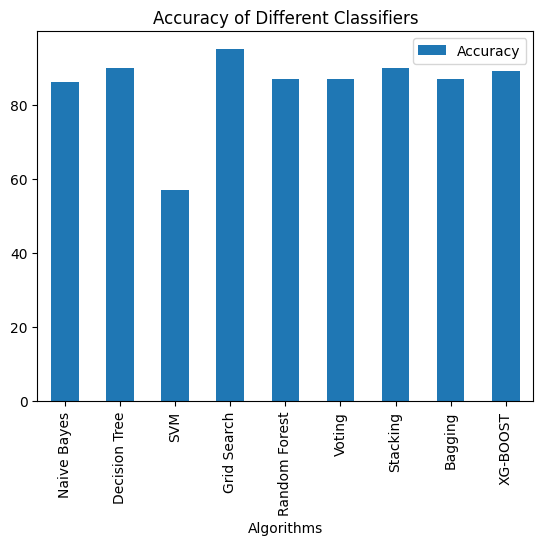

In [55]:
df.plot.bar(x='Algorithms',y='Accuracy',title="Accuracy of Different Classifiers");
plt.show(block=True);